# Machine Learning Engineer Nanodegree

## Unsupervised Learning

### Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

In [1]:
%%html
<style>
span.answer {
    display: inherit;
    background-color: #e7eff6;
    border-left: 4px solid #2a4d69;
    padding: 0.75em;
}
</style>

In [2]:
# %reload_ext watermark
# %watermark -v -m -p numpy,pandas,sklearn

CPython 3.7.2
IPython 6.5.0

numpy 1.16.2
pandas 0.24.1
sklearn 0.20.3

compiler   : Clang 10.0.0 (clang-1000.11.45.5)
system     : Darwin
release    : 18.2.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


#### Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis=1, inplace=True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


#### Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [4]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


##### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [5]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [85, 303, 436]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns=data.keys()).reset_index(drop=True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16117,46197,92780,1026,40827,2944
1,2599,3688,13829,492,10069,59
2,39228,1431,764,4510,93,2346


##### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

<span class="answer">

##### Answer 1

The first customer (index 85) seems for me to be a large supermarket chain or a retailer because she bought more than the average in all categories except in **Frozen**.

The second customer (index 303) might be a small local supermarket because it sells mostly __Grocery__ and **Detergents & Paper**. In addition it bought __Fresh__ and **Milk** quiet a bit.

The last one (index 436) might be a restaurant because it bought **Fresh** and __Delicatessen__ the most. In addition it bought some **Frozen** as well.

</span>

##### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [6]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
dropped_feature = 'Milk'
new_data = data.drop([dropped_feature], axis=1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, data[dropped_feature], 
                                                    test_size=0.25, random_state=4711)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=4711)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print("Regressor score predicting '{}': {}".format(dropped_feature, score))

Regressor score predicting 'Milk': -0.0030837585721632532


##### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

<span class="answer">

##### Answer 2

I tried to predict the feature **Milk** and got a score of about __-0.0031__. That means that this feature is hard to predict from the other features. Hence I consider it necessary for identifying customers' spending habits.

</span>

##### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

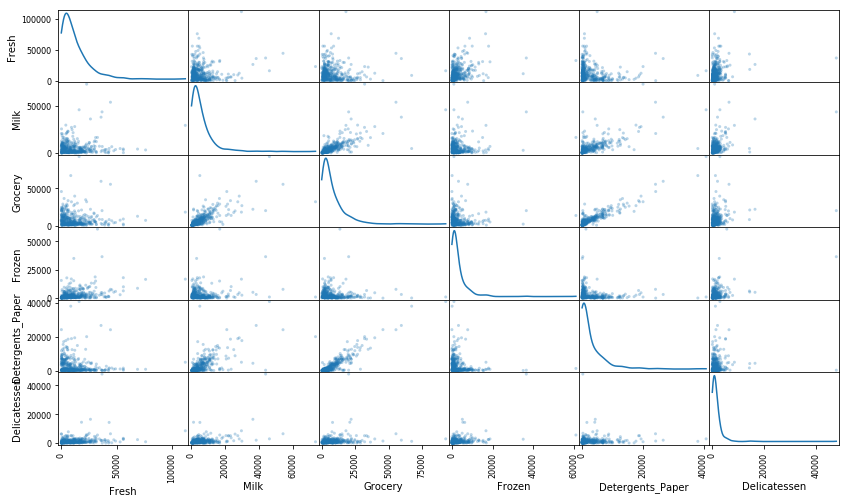

In [7]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

##### Question 3

* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

<span class="answer">

##### Answer 3

- First of all we can see that the data does not follow a normal distribution.
- All features are right skewed and most of the data is around 0.
- We can see that all features do have some large values. I would expect that because for example large retailers would spent lot more money.

Let's see that with some more visualizations by only plotting the KDE:

</span>

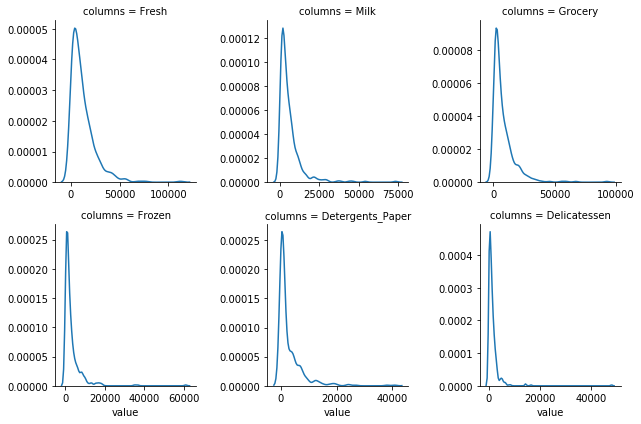

In [8]:
# import needed libraries
import matplotlib.pyplot as plt
import seaborn as sns

# create facet grid and create distplots for all columns
g = sns.FacetGrid(data.melt(var_name='columns'), col='columns', col_wrap=3, sharex=False, sharey=False)
g = (g.map(sns.distplot, 'value', hist=False))

<span class="answer">
    
In these plots one can see the points above more detailed. In addition it is visible that all features do have a high variance due to the large values/outliers.

In addition the scatter matrix seem to show a little correlation between **Grocery and Milk** as well as __Grocery and Detergents_Paper__. Let's check:
    
</span>

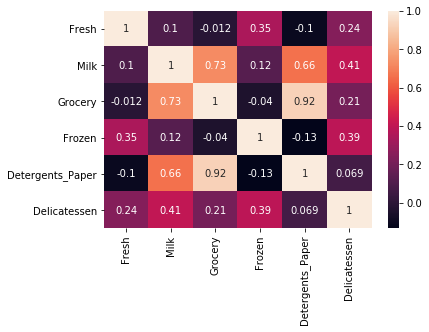

In [9]:
sns.heatmap(data.corr(), annot=True);

<span class="answer">

Here we can see a correlation between **Milk and Grocery** as well as __Milk and Detergents_Paper__. In addition there is a strong correlation between **Grocery and Detergents_Paper**.

</span>

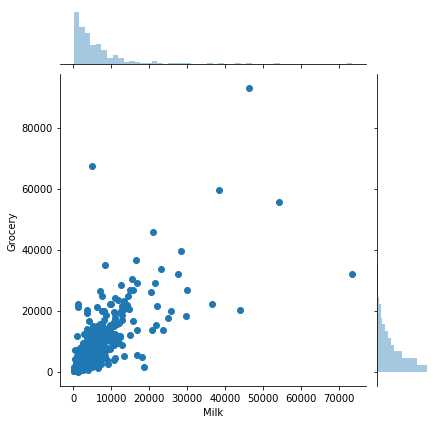

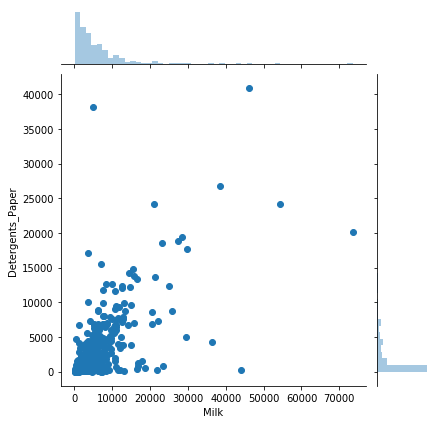

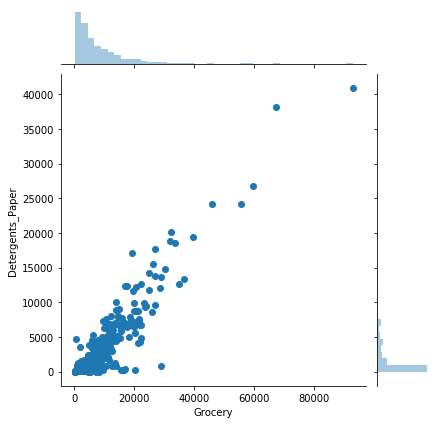

In [10]:
sns.jointplot(x='Milk', y='Grocery', data=data);
sns.jointplot(x='Milk', y='Detergents_Paper', data=data);
sns.jointplot(x='Grocery', y='Detergents_Paper', data=data);

<span class="answer">

From these plots I consider only **Grocery** and __Detergents_Paper__ to have a strong linear correlation. **Milk** and __Grocery__ might have a linear correlation as well - but we need to see that without outliers.

My assumption above was that **Milk** would be predictable but none of the other features do have such a strong correlation to be able to predict __Milk__. Hence **Milk** might be an important feature.

</span>

#### Data Preprocessing

In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

##### Implementation: Feature Scaling

If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

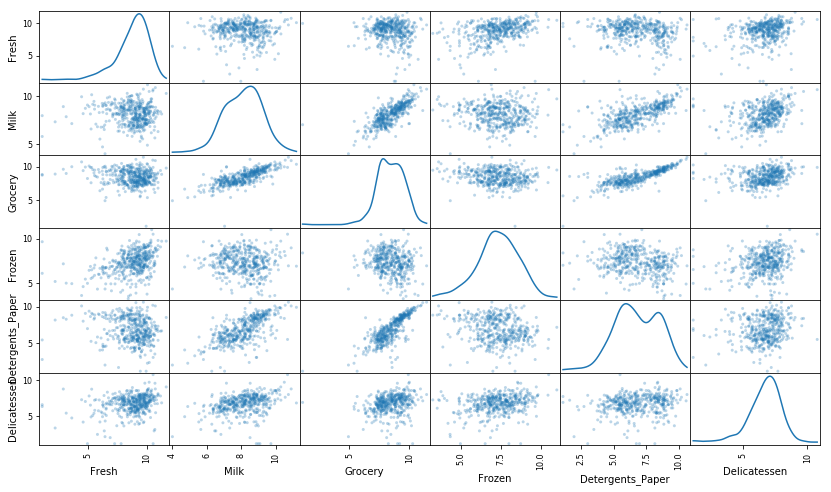

In [11]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

##### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [12]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
1,7.862882,8.212840,9.534523,6.198479,9.217217,4.077537
2,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467


<span class="answer">

As mentioned: the scatterplots between the variables identified as having a correlation is still visible here.
   
</span>

##### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [13]:
# store all outliers in one np array; could used a set here to directly store only unique values, 
# but using np.array here is easier to find entries being outlier in more than one category
all_outliers = np.array([], dtype='int64')

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1) * 1.5
    
    # Store the outliers
    outlier_index = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index
    
    # add them to all_outliers
    all_outliers = np.append(all_outliers, outlier_index.array)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data.iloc[outlier_index])

# OPTIONAL: Select the indices for data points you wish to remove
# use np.unique to get only unique indexes but return the counts as well: 
#  that can be used to see the indexes that are considered outliers in more than one category
outliers, outliers_count = np.unique(all_outliers, return_counts=True)

# display outliers that are considered outliers in more than one category
print("Data points considered outliers in more than one feature:")
display(log_data.iloc[outliers[outliers_count > 1].tolist()])

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print("Removed {} data points considered as outliers.".format(len(log_data)-len(good_data)))

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Data points considered outliers in more than one feature:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Removed 42 data points considered as outliers.


##### Question 4

* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

In [14]:
display(data.iloc[outliers[outliers_count > 1].tolist()])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,85,20959,45828,36,24231,1423
66,9,1534,7417,175,3468,27
75,20398,1137,3,4407,3,975
128,140,8847,3823,142,1062,3
154,622,55,137,75,7,8


<span class="answer">

##### Answer 4

The code above determined **5** data points considered outlier for more than one feature (indizes __65, 66, 75, 128, and 154__). These look a little suspicious because they spent nearly nothing in some categories and a high amount in others.

These five as well as all other _outliers_ were removed from the data set (in total 42 data points). 

This is because some clustering algorithms like _k-means_ do not work well if outliers are in the data. In K-Means for example each observation belongs to the cluster with the nearest mean. If there are outliners in the data, these outliner tend to move the center away from the real center. 

If needed we are able to restore these removed rows easily - for example if **DBSCAN** will be used for cluster analysis later on.

</span>

#### Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

##### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

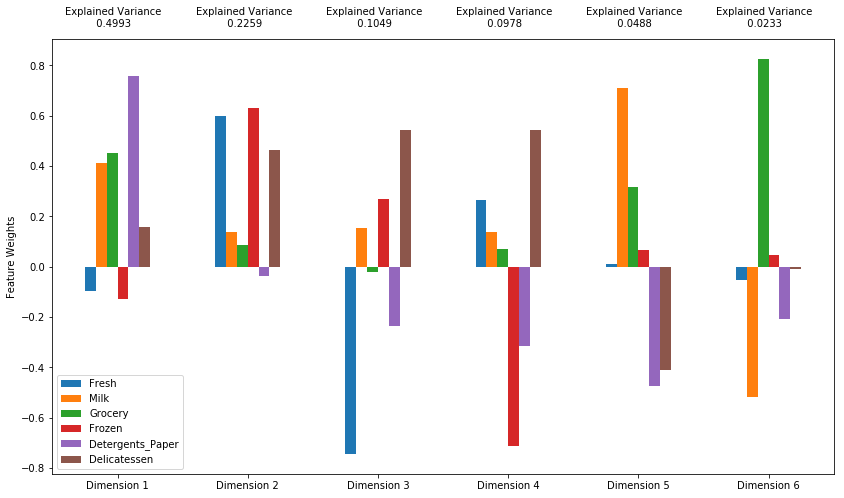

In [15]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
# --> n_components is not needed then because it defaults to min(n_samples, n_features) which is 6
from sklearn.decomposition import PCA
pca = PCA(random_state=4711).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

##### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

In [16]:
np.sum(pca.explained_variance_ratio_[:2])*100, np.sum(pca.explained_variance_ratio_[:4])*100

(72.525290486636, 92.79536052307857)

In [17]:
pca.explained_variance_

array([4.10320197, 1.85680266, 0.86191133, 0.80384844, 0.40095686,
       0.19110812])

<span class="answer">

##### Answer 5

- The first two components explain about 73% of the data.
- The first four components explain about 93%.

If I understand PCA correctly each component represents a new one dimensional feature, and the mid-point has value 0. Each original feature **loads** or __correlates__ to the new feature in a given direction and strength. The sign gives the direction on the eigenvector the component represents in the data. The strength tells us how much the original feature **loads** to the new feature. (By the way the eigenvalue tells us how much variance there is in the data on this eigenvector.)

Given that:

###### Principal Component 1 (Eigenvalue 4.10320197)

The features **Milk, Grocery, Detergents & Paper** load most in this PC. __Detergents & Paper__ has the largest feature weight, hence customers with high value in this dimension are likely to purchase this category. As **Milk** and __Grocery__ contribute high as well these customers might be _Convenience Shops_. That seems to hold true seeing that **Fresh** and __Frozen__ do have a small inverse relationship in this dimension. In other words customers represented in this PC are likely to purchase less in these two categories.

###### Principal Component 2 (Eigenvalue 1.85680266)

In this component **Fresh, Frozen and Delicatessen** contribute most. __Milk and Grocery__ as well as **Detergents & Paper** do not correlate that much here, __Detergents & Paper__ does not play a role. 
This dimension might represent **restaurants**.

###### Principal Component 3 (Eigenvalue 0.86191133)

Here we see a large contribution of **Fresh** and __Delicatessen__, as well as smaller loads from **Frozen** and __Detergents & Paper__. **Milk** loads here too.
Interestingly there seem to be two inverse relationships exist in this PC. That means that customer spending on **Fresh** as well as __Detergents & Paper__ is very low but in **Delicatessen** and __Frozen__ is higher. In other words customers represented in this dimonsen that buy a lot of **Delicatessen** perhaps are buying very less __Fresh__. I think that this dimension represents **deli** stores.

###### Principal Component 4 (Eigenvalue 0.80384844)

In this PC the highest loads are from **Delicatessen** and __Frozen__ followed by **Fresh** and __Detergents & Paper__. Again we see a high inverse relationship, in this case with **Frozen**. Hence this dimension represents customers spending most in __Delicatessen__ and **Fresh** but nearly nothing in __Frozen__ and less in **Detergents & Paper**. As __Milk__ and **Grocery** is represented here as well I assume that this dimension might represent high-cost __food markets__. 

###### Principal Component 5 (Eigenvalue 0.40095686)

Here the load of **Milk** is very high. Again there is a inverse relationship with __Detergents & Paper__ as well as **Delicatessen**. __Grocery__ loads high too, **Frozen** and __Fresh__ do not play a significant role. 

###### Principal Component 6 (Eigenvalue 0.19110812)

The three features contribute most here are **Grocery, Milk and Detergents & Paper**. The other three do not load that much.

</span>

##### Observation

Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [18]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,5.5240,1.1625,-0.6076,0.5663,0.4874,0.2678
1,2.2185,-2.6646,-1.5868,-1.5660,0.2967,0.3953
2,-3.0021,1.8686,-0.0080,0.7262,-0.4136,-0.6116


In [19]:
for idx in range(len(samples)):
    display(samples.iloc[idx].sort_values(ascending=False))

Grocery             92780
Milk                46197
Detergents_Paper    40827
Fresh               16117
Delicatessen         2944
Frozen               1026
Name: 0, dtype: int64

Grocery             13829
Detergents_Paper    10069
Milk                 3688
Fresh                2599
Frozen                492
Delicatessen           59
Name: 1, dtype: int64

Fresh               39228
Frozen               4510
Delicatessen         2346
Milk                 1431
Grocery               764
Detergents_Paper       93
Name: 2, dtype: int64

<span class="answer">
    
##### Sample 1

This one spent a lot in **Grocery, Milk and Detergents_Paper**. According to that __PC 1__ represts that best.

##### Sample 2

This sample spent most in **Grocery and Detergents_Paper**. As __Milk__ is represented as well **PC 1** fits best again.

##### Sample 3

Here we see a high amount of spending in **Fresh**. Given that alone show that __PC 2__ fits best having this as restaurant.

Overall that does match with my first interpretation of question 1.

</span>

##### Implementation: Dimensionality Reduction

When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [20]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2, random_state=4711).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

##### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [21]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,5.5240,1.1625
1,2.2185,-2.6646
2,-3.0021,1.8686


#### Visualizing a Biplot

A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

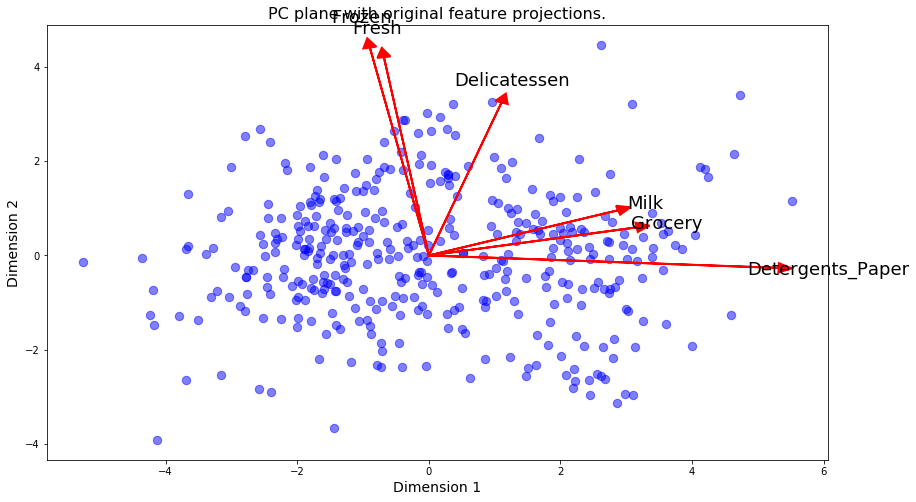

In [22]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca);

##### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

<span class="answer">

The biplot shows what the *pca_results* plot above plotted: The features **Milk, Grocery and Detergents_Paper** correlate most with PC1, __Fresh, Frozen and Delicatessen__ correlate most with PC2.

</span>

#### Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

##### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

<span class="answer">

##### Answer 6

**The advantages of using a K-Means clustering are:**

- It is fast and scales well to large number of samples.
- It is memory efficient.
- Is it easy to understand and to implement.
- Any data point is assigned exactly one cluster (what is a drawback as well).

**The advantages of Gaussian Mixture Model clustering are:**

- It is fast as well.
- It can find clusters of different size and different density - not only circular like in K-Means.
- Any data point is assigned a propability belonging to clusters. That means that clusters can overlap and that a data point can belong to no cluster at all.

**Choosen algorithm:**

My intuition tells me that GGM is the better algorithm here because I assume that the clusters overlap, hence a hard clustering will not perform good. In addition I assume that the clusters are not circular - even after we transformed the data by PCA.

But to proove my intution I'll use both algorithms. I'll just do that to learn more about how they differ.

</span>

##### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [23]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def get_max_silhouette_score(max_loops):
    """Given a number of loops this function fits and predicts both 'KMeans' and 'GaussianMixture' on
    our reduced_data. It will calculate the silhouette score and returns the best result."""
    max_score = 0
    for clusterer in ['KMeans', 'GaussianMixture']:
        for n_components in range(2, max_loops):
            if clusterer == 'KMeans':
                l_clusterer = KMeans(n_clusters=n_components, random_state=4711).fit(reduced_data)
            elif clusterer == 'GaussianMixture':
                l_clusterer = GaussianMixture(n_components=n_components, random_state=4711).fit(reduced_data)
            l_preds = l_clusterer.predict(reduced_data)
            l_score = silhouette_score(reduced_data, l_preds)
            print('{} | {} | {}'.format(clusterer, n_components, l_score))
            if l_score > max_score:
                max_score = l_score
                best_algo = l_clusterer
                best_preds = l_preds
    return (max_score, best_algo, best_preds)

In [24]:
# try from 2 to 5 components/clusters - I assume that this will not work that good above 2
# because we reduced our features to two PCs above
(score, clusterer, preds) = get_max_silhouette_score(6)
print('Max silhouette score: {}\nUsed clusterer: {}'.format(score, clusterer))

KMeans | 2 | 0.447157742293467
KMeans | 3 | 0.3639864798401739
KMeans | 4 | 0.3311509542845657
KMeans | 5 | 0.3524290101127668
GaussianMixture | 2 | 0.446753526944537
GaussianMixture | 3 | 0.3537547096300871
GaussianMixture | 4 | 0.31513757092009265
GaussianMixture | 5 | 0.31356874310508004
Max silhouette score: 0.447157742293467
Used clusterer: KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=4711, tol=0.0001, verbose=0)


In [25]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
# clusterer = None

# TODO: Predict the cluster for each data point
# preds = None

# TODO: Find the cluster centers
if isinstance(clusterer, KMeans):
    centers = clusterer.cluster_centers_
elif isinstance(clusterer, GaussianMixture):
    centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
# score = None

##### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

<span class="answer">

##### Answer 7

The scores were printed by the funtion above.

Interestingly my intution was wrong. The best clusterer was KMeans using 2 clusters giving a score of 0.447157742293467. But GaussianMixture is not that bad either. The score using 2 components is nearly as high as using KMeans.

My guess was right that the score will not raise above 2.

</span>

##### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

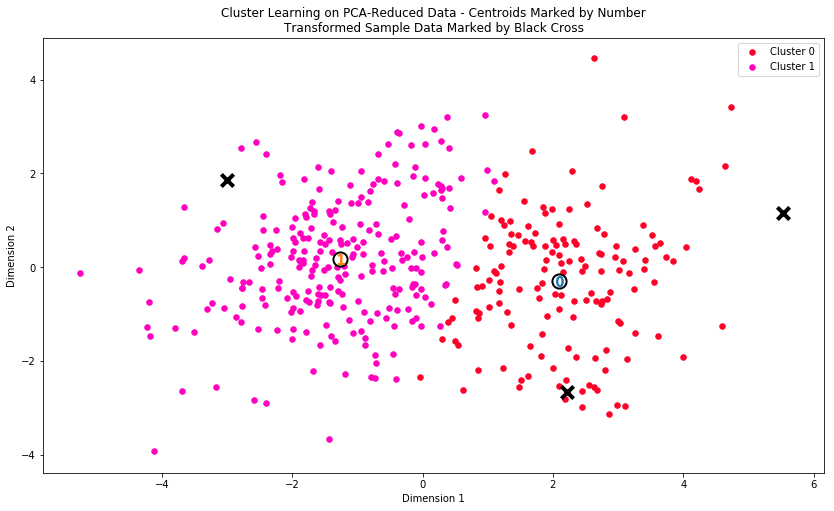

In [26]:
# AS GaussianMixture was nearly as good I'll plot both:
gm = GaussianMixture(n_components=2, random_state=4711).fit(reduced_data)
gm_preds = gm.predict(reduced_data)
gm_centers = gm.means_
gm_sample_preds = gm.predict(pca_samples)
vs.cluster_results(reduced_data, gm_preds, gm_centers, pca_samples);

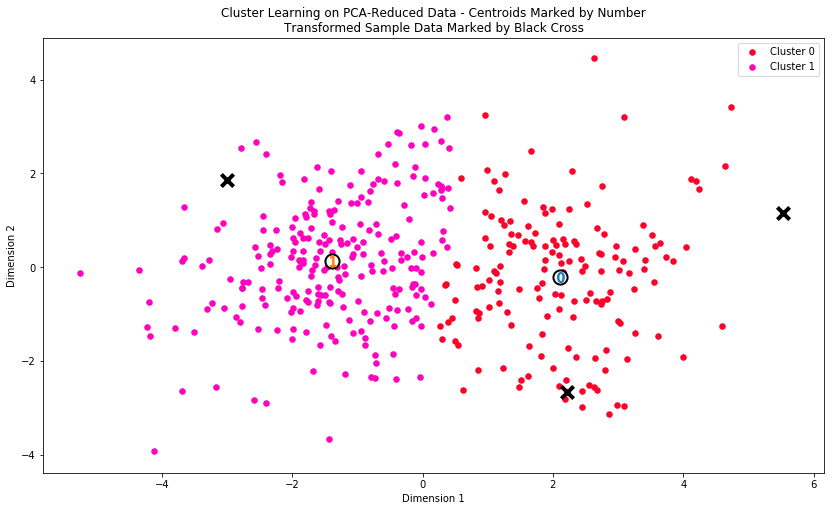

In [27]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples);

<span class="answer">

As expected the clusters are nearly the same but show differences along the cluster borders.

**It would be nice to see a plot showing the points that were predicted differently in another color.**

_Below I'll stay with the KMeans clusterer._

</span>

##### Implementation: Data Recovery

Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [28]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,5424.0,7780.0,11532.0,1123.0,4444.0,1136.0
Segment 1,9451.0,1938.0,2449.0,2200.0,307.0,771.0


##### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project (specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

In [29]:
df = true_centers.copy()
df.loc['Data Mean'] = data.mean()
df.loc['Data Median'] = data.median()
display(df)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,5424.000000,7780.000000,11532.000000,1123.000000,4444.000000,1136.000000
Segment 1,9451.000000,1938.000000,2449.000000,2200.000000,307.000000,771.000000
Data Mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
Data Median,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000


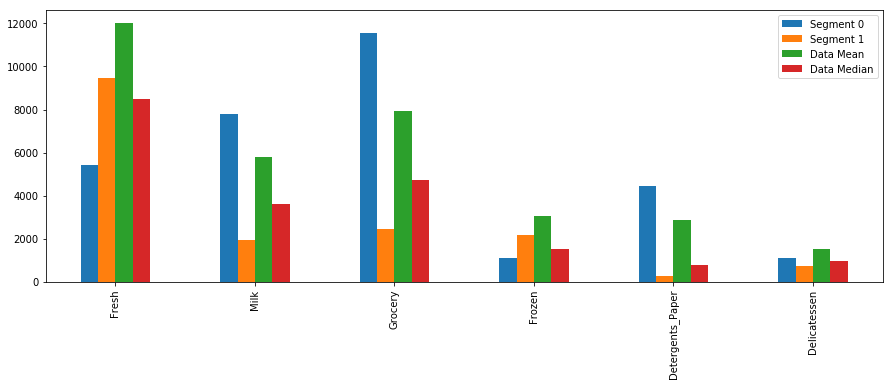

In [30]:
df.transpose().plot(kind='bar', figsize=(15, 5));

In [31]:
df = true_centers.copy()
org_data = data.drop(data.index[outliers]).reset_index(drop=True)
df.loc['Data Mean'] = org_data.mean()
df.loc['Data Median'] = org_data.median()
display(df)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,5424.000000,7780.00000,11532.000000,1123.000000,4444.000000,1136.00000
Segment 1,9451.000000,1938.00000,2449.000000,2200.000000,307.000000,771.00000
Data Mean,12430.630653,5486.31407,7504.907035,3028.809045,2725.376884,1454.71608
Data Median,9108.000000,3611.50000,4573.000000,1729.500000,788.000000,997.50000


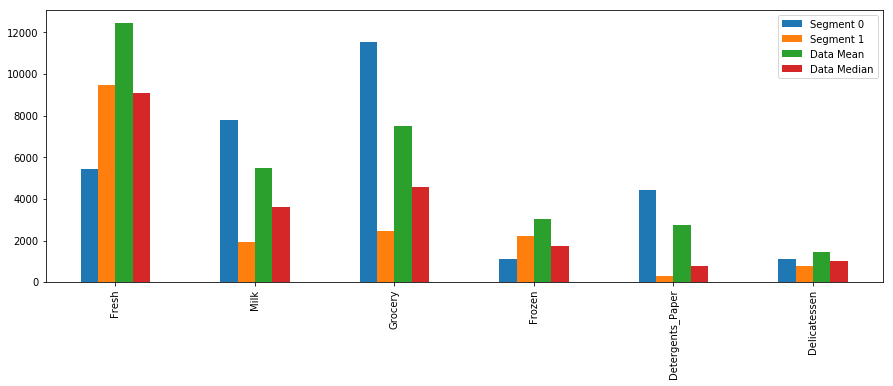

In [32]:
df.transpose().plot(kind='bar', figsize=(15, 5));

In [33]:
df.loc[['Data Mean', 'Segment 0']].pct_change()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Data Mean,NaN,NaN,NaN,NaN,NaN,NaN
Segment 0,-0.563659,0.418074,0.536595,-0.629227,0.6306,-0.219092


In [34]:
df.loc[['Data Median', 'Segment 0']].pct_change()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Data Median,NaN,NaN,NaN,NaN,NaN,NaN
Segment 0,-0.40448,1.15423,1.521758,-0.350679,4.639594,0.138847


In [35]:
df.loc[['Data Mean', 'Segment 1']].pct_change()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Data Mean,NaN,NaN,NaN,NaN,NaN,NaN
Segment 1,-0.239701,-0.646757,-0.67368,-0.273642,-0.887355,-0.47


In [36]:
df.loc[['Data Median', 'Segment 1']].pct_change()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Data Median,NaN,NaN,NaN,NaN,NaN,NaN
Segment 1,0.037659,-0.463381,-0.464465,0.272044,-0.610406,-0.227068


<span class="answer">

##### Answer 8

The last two plots show **mean** and __median__ of the original data per category as well as for the data having the outliers removed. As the mean is prone to outliers it is visible that it is higher than the median on all categories.

Relating `Segment 0` and `Segment 1` to these statistics (looking at the data having the *outliers* removed):

###### Segment 0

For this segment we see that **Milk**, __Grocery__ and **Detergents & Paper** is bought more than on average and on median. Compared to the median all three are bought a lot more. From the mean the increase in __Milk__ is about 42%, **Grocery** is about 54% and __Detergents & Paper__ about 63%.

We see as well that **Fresh** and __Frozen__ are bought around 60% less than on average, **Delicatessen** is about 22% less from the mean.

This segment fits to the first principle component shown in PCA and might represent _Convenience Shops_ and *retailers*.

###### Segment 1

In contrast this segment bought less than the average in all categories. The decrease is not that much in **Fresh** and __Frozen__. If compared to the median we can see a small increase in these categories as well. 

This segment might represent *restaurants* as **Delicatessen** are bought nearly as the median.

</span>

##### Question 9

* For each sample point, which customer segment from **Question 8** best represents it? 
* Are the predictions for each sample point consistent with this?

Run the code block below to find which cluster each sample point is predicted to be.

In [37]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


In [38]:
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16117,46197,92780,1026,40827,2944
1,2599,3688,13829,492,10069,59
2,39228,1431,764,4510,93,2346


<span class="answer">

##### Answer 9

###### Sample Point 1

We see that this customer bought more than on average in **Milk, Grocery and Detergents & Paper** but less compared to the average only in __Frozen__. That does not fit _exactly_ to either of these segments. But the best prediction is **Segment 0**. This point is best represented as _retailer_.

###### Sample Point 2

The customer of this point bought more than on average in **Grocery and Detergents & Paper** and less than the average in all other categories. As we saw in PCA the first PC was mostly loaded by **Detergents & Paper**. Hence this point was predicted to the Cluster that is represented by this PC. Again this customer does not fit exactly to the segments above. 

This sample point is best represented as _Convenience Shop_.

###### Sample Point 3

This customer bought more than on average in **Fresh, Frozen and Delicatessen** but less in the rest. The prediction to cluster / segment 1 is consistent. This customer might be a _Restaurant_ because it uses a lot of fresh and frozen food as well as delicatessen.

</span>

#### Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

##### Question 10

Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?

<span class="answer">

##### Answer 10

First the distributor can use the segments to see which might need a delivery all 5 days a week and which not. 

For example: Customers that buy more fresh goods and milk products - like restaurants - might not benefit from a change to 3 days a week because fresh goods will be no longer fresh then. 

Given that: having the two segments above I assume that segment 1 will not benefit from the change but will react negative. 

Hence the distributor can start implementing an A/B test with segment/cluster 0 as the customers of this cluster largely buy goods that will not need to be delivered every day. 

For the test the distributor should

- randomly select 10 to 20% of the customers in cluster 0
- test the new delivery service schedule for some weeks (2 to 4)
- note down how these customers react (for example on a scale from -1 to +1)
- take the mean values of these values
- if the mean value for a cluster is positive, then they can consider making the change for more customers in that segment

</span>

##### Question 11

Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

<span class="answer">
    
##### Answer 11

The distributor can reuse the clusterer we trained in this project above to train a supervised learning algorithm like SVM or KNN. The features to train would be the existing product spending data and labels we obtained above. The target variable to predict would be the customer segment - in our case Segment 0 or Segment 1.

</span>

##### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

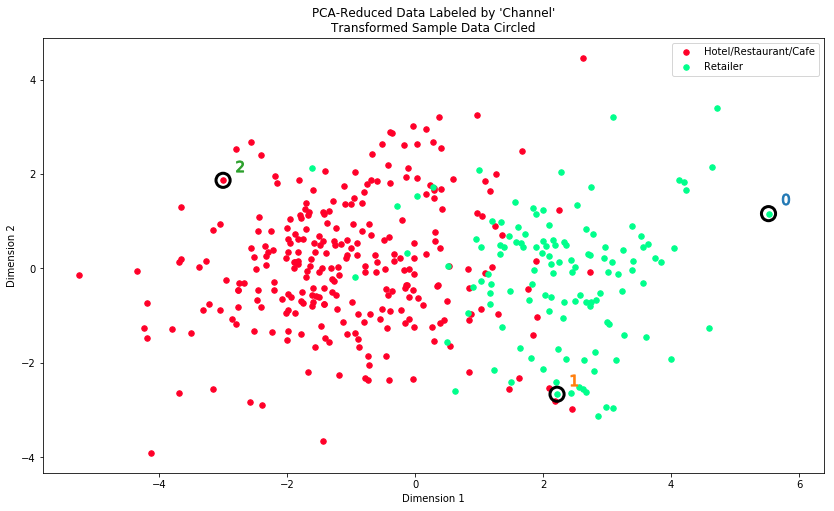

In [39]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

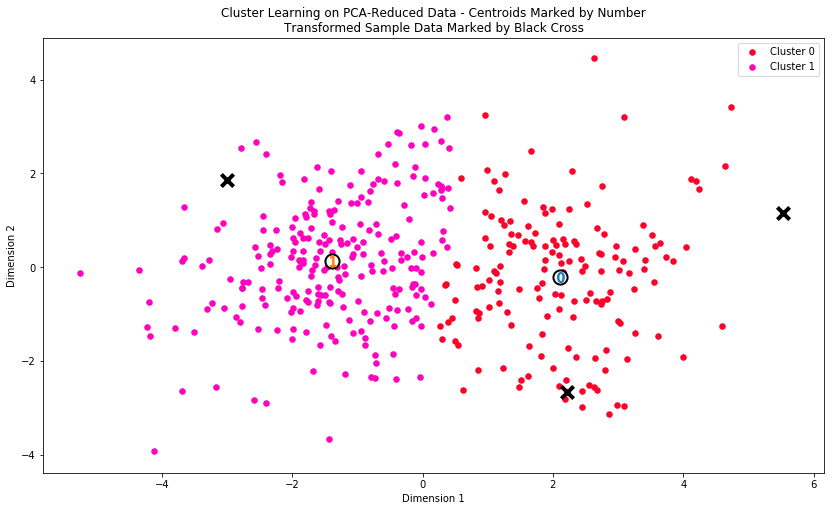

In [40]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples);

##### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

<span class="answer">

##### Answer 12

- The clustering algorithm and the number of clusters (2) did a good job compared to the underlying distribution. The problem here is that both algorithms tried (GMM and K-Means) draw a hard cluster border but the segments are more mixed as one can see on the top point (what is incorrectly assigned to cluster 1) and the red points in between the green points and vice versa.
- Both models won't be able to classify the anomalies correctly using our two principal components and clusters. As we see in real-world the separation of the data is less well-defined because there a in real-life no hard borders that a retailer is a retailer because it buys X amount of that and Y amount of that. 
- As there are only two channels here these classifications can be seen as consistent with our previous definition. I labeled cluster 0 as *restaurants* and cluster 1 as _super markets_, *retailers* and _convinient stores_. In general these all can be seen as *retailers*.

</span>